In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression  
w is slope  

b is intercept  

$ y\_pred = wx + b$

In [2]:
def linear(x, w, b):
    return (w*np.array(x) +b)

## Mean Square Error  
$error = {(y\_pred - y)^2}$  

For more than 1 input  
$error = \frac{\sum\limits_{i=1}^{n}(y\_pred-y)^2}{n}$

In [3]:
def MSE(y, y_pred):
    if len(y) == len(y_pred):
        return (np.sum(y_pred - y) ** 2)/len(y)
    else:
        raise Exception("Incompactable length")

## Gradient  
[refer](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e#:~:text=Gradient%20Descent%20Algorithm%20helps%20us,the%20graph%20at%20the%20point.)  

x is independent vaiable y is dependent variable  

when we adjust the w and b values we can modify y_pred value  

J is cost function or loss function  

$$
\begin{aligned}
&ypred = wx+b\\\
\\\
&err = (ypred - y)\\\
\\\
&J_{err} = \frac{err^2}{n}\\\
\\\
&J_{err} = \frac{1}{n} err^2 \\\
\\\ Partial\ Derivative \\\
&J_{err} = 2*err \  J_{err}err\\\
\\\ Take\ derivation\ based\ on\ w,b 
\\\
&\frac{\delta J}{\delta w} = wx+b\\\
\\\
&\frac{\delta J}{\delta w} = x\\\
\\\
&\frac{\delta J}{\delta b} = wx+b\\\
\\\
&\frac{\delta J}{\delta b} = 1\\\
\\\
&w = w - (2 * err * x/n) * learning\_rate\\\
&b = b - (2 * err * 1/n) * learning\_rate\\\

\end{aligned}
$$
```This 2 in this equation isn’t that significant since it just says that we have a learning rate twice as big or half as big. So let’s get rid of it too```  
$$
w = w - \frac{err * x}{n} * learning\_rate\\\
\\\
b = b - \frac{err * 1}{n} * learning\_rate
$$

### update  
$w\ = w\ -\ \frac{(\sum\limits_{i=0}^n(\sum\limits_{j=0}^m{x*2}) * error)}{n} * learning\_rate$

In [4]:
def gradient(w, b, x, y, y_pred, lr = 0.01):
    # old - gradient * learningrate
    error = y_pred - y
    # method 1
    # w = w - (2 * error * x ).mean() * lr # multiply by 2 i not more impact
    # b = b - (2 * error * 1).mean() * lr # multiply by 2 i not more impact
    # method 2 this more powerful than method 1 and multply by 2 is also powerful
    w = w - (np.sum(x * 2) * error).mean() * lr
    b = b - (error * 2).mean() * lr
    

    return w,b

## Accuracy is calculated by R<sup>2</sup>  

$$R^2 = \frac{\sum\limits_{i=0}^n y\_pred}{\sum\limits_{i=0}^n y}$$

In [5]:
def accuracy(y, y_pred):
    return np.sum(y_pred) / np.sum(y)

In [6]:
def train(x, y, epoch=20, traditional=True):
    if traditional :
        x_mean = x.mean()
        y_mean = y.mean()
        w = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean) ** 2 )
        b = y_mean -(w * x_mean )
        del x_mean
        del y_mean
    else:
        w = np.random.rand(1)
        b = np.random.rand(1)

        for i in range(epoch):
            # forward
            y_pred = linear(x, w, b)
            # backward
            w,b = gradient(w,b,x,y,y_pred)
            print(f'Epoch : {i+1} Loss : {MSE(y_pred, y) : .2f} accuracy : {accuracy(y,y_pred) : .2f}')
    return w,b


In [7]:
x = np.array([1,2,3,4,5]) 
y = np.array([2,4,6,8,10])
w,b = train(x,y,20, False)
print(w,b) # correct is w = 2, b = 0 for input x = [1,2,3] y=[2,4,6]

Epoch : 1 Loss :  66.15 accuracy :  0.39
Epoch : 2 Loss :  0.42 accuracy :  0.95
Epoch : 3 Loss :  0.00 accuracy :  1.00
Epoch : 4 Loss :  0.00 accuracy :  1.00
Epoch : 5 Loss :  0.00 accuracy :  1.00
Epoch : 6 Loss :  0.00 accuracy :  1.00
Epoch : 7 Loss :  0.00 accuracy :  1.00
Epoch : 8 Loss :  0.00 accuracy :  1.00
Epoch : 9 Loss :  0.00 accuracy :  1.00
Epoch : 10 Loss :  0.00 accuracy :  1.00
Epoch : 11 Loss :  0.00 accuracy :  1.00
Epoch : 12 Loss :  0.00 accuracy :  1.00
Epoch : 13 Loss :  0.00 accuracy :  1.00
Epoch : 14 Loss :  0.00 accuracy :  1.00
Epoch : 15 Loss :  0.00 accuracy :  1.00
Epoch : 16 Loss :  0.00 accuracy :  1.00
Epoch : 17 Loss :  0.00 accuracy :  1.00
Epoch : 18 Loss :  0.00 accuracy :  1.00
Epoch : 19 Loss :  0.00 accuracy :  1.00
Epoch : 20 Loss :  0.00 accuracy :  1.00
[1.85801967] [0.425941]


In [8]:
def plot(x_plot):
    y_plot = linear(x_plot, math.floor(w), math.floor(b))
    plt.plot(y_plot)
    plt.scatter(x, y)

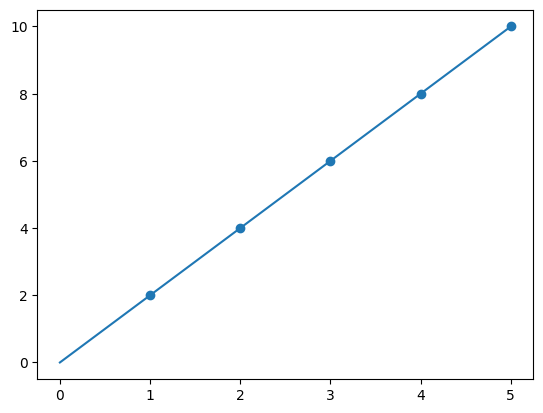

In [9]:
plot(range(0,12,2))